# 4.) Classifying MNIST with multilayer perceptron

In [1]:
import mlpclassifier

First we import the MNIST testing data. 

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

print('Loading and preprocessing data')
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

Loading and preprocessing data


In [3]:
import numpy as np

def create_one_hot_labels(labels, dim=10):
    one_hot_labels = np.zeros((labels.shape[0], dim))
    for i in range(labels.shape[0]):
        one_hot_labels[i][labels[i]] = 1
    return one_hot_labels

# Split data into train partition and test partition
(train_data, test_data, train_labels, test_labels) = train_test_split(X, y, random_state=0, test_size=0.7)

# Convert labels from integers to one-hot encodings
test_labels = create_one_hot_labels(test_labels.astype(int))
train_labels = create_one_hot_labels(train_labels.astype(int))

Next we initialize the model so that it has an input layer of 784 units, an output layer of 10 units, and a hidden layer with 128 units. We also use the ReLu activation function.  

In [4]:

# Initialize model
print('Initializing neural network')
model = mlpclassifier.MLP(784, 10, [128], [mlpclassifier.relu])

selected = np.random.randint(test_data.shape[0], size=100)
true_labels = np.argmax(test_labels[selected], axis=1)
preds_init = model.predict(test_data[selected])

Initializing neural network


In [5]:
print('Start training')

n_train = train_data.shape[0]
n_epochs = 10
batch_size = 100
opt = mlpclassifier.GradientDescentOptimizer(0.01)

for i in range(n_epochs):
    sum_loss = 0.0
    for j in range((n_train - 1) // batch_size + 1):
        batch_data = train_data[j*batch_size:(j+1)*batch_size]
        batch_labels = train_labels[j*batch_size:(j+1)*batch_size]
        _, loss = model.forwardprop(batch_data, batch_labels)
        if np.isnan(loss):
            print('batch %s loss is abnormal')
            print(loss)
            continue
        sum_loss += loss
        model.backprop(batch_labels)
        opt.update(model)
    train_loss = sum_loss/(j+1)
    train_accuracy = (np.sum(model.predict(train_data) == 
                              np.argmax(train_labels, axis=1)) / 
                      np.float(train_labels.shape[0]))
    
    print('=' * 20 + ('Epoch %d' % i) + '=' * 20)
    print('Train loss %s accuracy %s' % (train_loss, train_accuracy))

# Compute test loss and accuracy.
_, test_loss = model.forwardprop(test_data, test_labels)
test_accuracy = (np.sum(model.predict(test_data) == 
                        np.argmax(test_labels, axis=1)) / 
                  np.float(test_labels.shape[0]))
print('=' * 20 + 'Training finished' + '=' * 20 + '\n')
print ('Test loss %s accuracy %s\n' %
        (test_loss, test_accuracy))

preds_trained = model.predict(test_data[selected])


Start training
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
====================Epoch 0====================
Train loss 1.9592151536910765 accuracy 0.7335714285714285
====================Epoch 1====================
Train loss 1.322752155494685 accuracy 0.795952380952381
====================Epoch 2====================
Train loss 0.919062548473032 accuracy 0.8305714285714285
====================Epoch 3====================
Train loss 0.7187806612600911 accuracy 0.8471904761904762
====================Epoch 4====================
Train loss 0.610692031688598 accuracy 0.8574761904761905


From the output above, we can see that the model obtains a training loss of 0.42 and a training accuracy of 0.89 after 9 epochs of training. Then, when the classifier is run on the testing data, it achieves a similar loss of 0.42 and a similar testing accuracy of 0.89. 

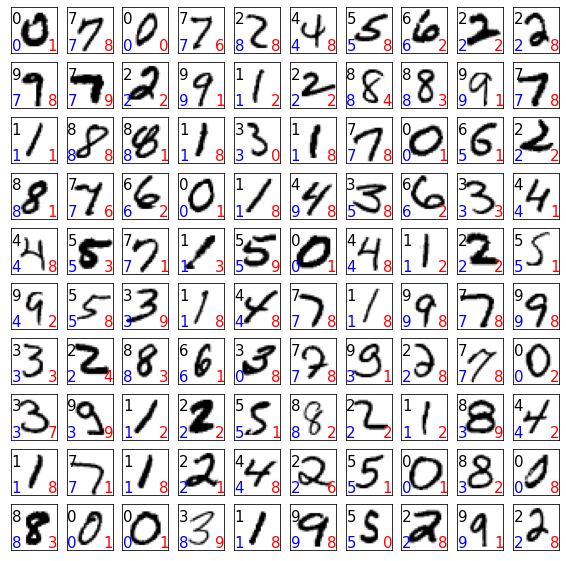

In [6]:
import matplotlib.pyplot as plt

# plot sample test images together with their groundtruth 
# and predicted labels before and after training

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(wspace=0)
for a, image, true_label, pred_init, pred_trained in zip(
        axes.flatten(), test_data[selected],
        true_labels, preds_init, preds_trained):
    a.imshow(image.reshape(28, 28), cmap='gray_r')
    a.text(0, 10, str(true_label), color="black", size=15)
    a.text(0, 26, str(pred_trained), color="blue", size=15)
    a.text(22, 26, str(pred_init), color="red", size=15)

    a.set_xticks(())
    a.set_yticks(())

plt.show()

Above we can see how well our model performs on some of the testing samples. The MNIST digits are drawn in each square, on the top left corner in black we have the true value, on the bottom left corner in blue we have the value after training the model, and in the bottom right corner in red we have the value before training the model. Since the initial weights and biases are randomized, we expect the red number to correspond to the true value only 1/9 of the time. After training we can see that the blue values are much more accurate, and these predictions agree with the true values in black around 88% of the time. It is also interesting to look at the incorrect predictions. For example the first number on the second row is technically the number 9, but the head of the nine is so wide and skinny that it is misinterpreted as a 7 by the model, which is quite a reasonable prediction to make. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a800b4b-4a86-4585-8bda-e63af82ec211' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>